# Regressão LASSO

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dados = pd.read_excel('C:/_Academico/PUC/202401/PROJETO INTEGRADO NEGÓCIOS/Regresao_Lasso_Ridge.xlsx')

Exibindo cinco primeiras linhas

In [6]:
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Coluna name possue apenas os nomes dos carros e por este motivo pode ser removida

In [7]:
dados = dados.drop('name',axis=1)

Determinando os valores máximos de cada coluna

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
normalizador = StandardScaler()

In [11]:
dados[['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'year', \
     'origin']] = normalizador.fit_transform(dados[['cylinders','displacement','horsepower',\
                                                  'weight','acceleration','year', 'origin']])

In [12]:
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,15.0,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,18.0,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,16.0,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,17.0,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


Determinando as variáveis X e Y

In [13]:
X = dados.drop('mpg',axis=1).values
Y = dados['mpg'].values

Aplicando regressão LASSO

In [1]:
from sklearn.linear_model import Lasso

Aplicando inicialmente com coeficiente alpha=0.5

In [14]:
modelo1 = Lasso(alpha=0.5)
modelo1.fit(X, Y)

Lasso(alpha=0.5)

In [15]:
score = modelo1.score(X, Y)

In [16]:
score

0.8106452902609764

Determinando o score com diferentes lambdas

In [19]:

# Definindo os valores de lambda
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5]

# Lista para armazenar os scores
scores = []

# Calculando os scores para cada valor de lambda
for i in range(len(lambdas)):
    modelo = Lasso(alpha=lambdas[i])
    modelo.fit(X, Y)
    score = modelo.score(X, Y)
    if score is not None:  # Verificando se o score foi calculado com sucesso
        scores.append(score)
    else:
        print(f"Erro ao calcular score para lambda = {lambdas[i]}")

# Criando um DataFrame com os scores e lambdas
df = pd.DataFrame({"Lambda": lambdas[:len(scores)], "Score": scores})

# Ordenando o DataFrame pelo valor de "Lambda" em ordem decrescente
df = df.sort_values(by="Score", ascending=False)

# Reiniciando o índice do DataFrame
df = df.reset_index(drop=True)

# Imprimindo o DataFrame ordenado
print(df)

    Lambda     Score
0  0.00001  0.821478
1  0.00010  0.821478
2  0.00100  0.821476
3  0.01000  0.821321
4  0.10000  0.817808
5  0.50000  0.810645
6  1.00000  0.788409
7  2.00000  0.707616
8  5.00000  0.281194


Modelo com lambda=0.00001 apresentou melhor score

In [26]:
modelo_final = Lasso(alpha=0.00001)
modelo_final.fit(X, Y)

Lasso(alpha=0.001)

In [27]:
Y_pred = modelo_final.predict(X)

Comparando previsões com os valores reais

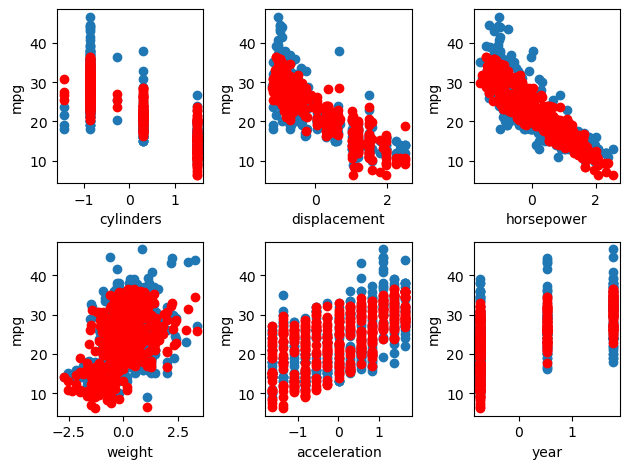

In [22]:
fig, ax = plt.subplots(2, 3)
ax[0,0].scatter(X[:,0],Y);
ax[0,0].scatter(X[:,0],Y_pred,color='red');
ax[0,0].set_xlabel('cylinders');
ax[0,0].set_ylabel('mpg');

ax[0,1].scatter(X[:,1],Y);
ax[0,1].scatter(X[:,1],Y_pred,color='red');
ax[0,1].set_xlabel('displacement');
ax[0,1].set_ylabel('mpg');

ax[0,2].scatter(X[:,3],Y);
ax[0,2].scatter(X[:,3],Y_pred,color='red');
ax[0,2].set_xlabel('horsepower');
ax[0,2].set_ylabel('mpg');

ax[1,0].scatter(X[:,4],Y);
ax[1,0].scatter(X[:,4],Y_pred,color='red');
ax[1,0].set_xlabel('weight');
ax[1,0].set_ylabel('mpg');

ax[1,1].scatter(X[:,5],Y);
ax[1,1].scatter(X[:,5],Y_pred,color='red');
ax[1,1].set_xlabel('acceleration');
ax[1,1].set_ylabel('mpg');

ax[1,2].scatter(X[:,6],Y);
ax[1,2].scatter(X[:,6],Y_pred,color='red');
ax[1,2].set_xlabel('year');
ax[1,2].set_ylabel('mpg');

plt.tight_layout();

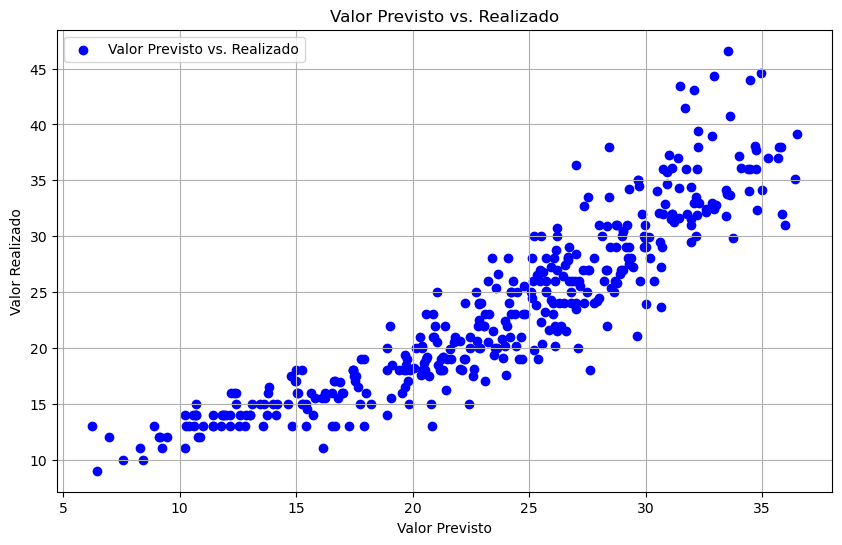

In [23]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, Y, color='blue', label='Valor Previsto vs. Realizado')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Realizado')
plt.title('Valor Previsto vs. Realizado')
plt.legend()
plt.grid(True)
plt.show()

In [28]:

# Coeficientes do modelo
coeficientes = modelo_final.coef_


# Variáveis
variaveis = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']

# Criar um DataFrame para visualização
df_coeficientes = pd.DataFrame({'Variável': variaveis, 'Coeficiente': coeficientes})

# Ordenar os coeficientes por magnitude
df_coeficientes = df_coeficientes.reindex(df_coeficientes['Coeficiente'].abs().sort_values(ascending=False).index)

# Imprimir os coeficientes
print(df_coeficientes)


       Variável  Coeficiente
3        weight    -5.478332
5          year     2.760591
1  displacement     2.033503
6        origin     1.142579
0     cylinders    -0.819424
2    horsepower    -0.643912
4  acceleration     0.219249
